In [126]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
import os

from kymatio.datasets import fetch_fsdd

from kymatio.scattering1d.filter_bank import scattering_filter_factory
from kymatio import Scattering1D

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.layers import Dense, Input, Lambda, AveragePooling1D
from tensorflow.keras.optimizers import Adam 
import tensorflow.keras as ks
import tensorflow as tf
 

from ipywidgets import interactive
import ipywidgets as widgets

import warnings


In [127]:
def plot_response(i,psis,ifft=False):
    T= len(psis[0]['levels'][0])

    fig= plt.figure(figsize=(8,8))


    if ifft==False:
        xs= np.linspace(0,1,T,endpoint=False)
        xs= np.log2(xs+1e-6)
        psi= psis[i]['levels'][0]
        

    else:
        xs= sp.fft.fftshift(sp.fft.fftfreq(T,1/T))
        psi= sp.fft.fftshift(sp.fft.ifft(psis[i]['levels'][0]))

    plt.plot(xs,np.real(psi))
    plt.show()

def id_and_cat(str):
    x= (str.split('.')[0]).split('_')
    
    return int(x[2]),int(x[0])

## Question 2

In [128]:
T=8192
J=6
Q=(16,16)

phis,psis1,psis2= scattering_filter_factory(T,J,Q,T)

## Question 3 and 4


In [129]:
inter_plot= interactive(
    plot_response,
    i= widgets.IntSlider(min=0,max=len(psis1)-1,step=1,value=0),
    psis= widgets.fixed(psis1),
)

display(inter_plot)

interactive(children=(IntSlider(value=0, description='i', max=62), Checkbox(value=False, description='ifft'), …

## Question 5

In [130]:
inter_plot= interactive(
    plot_response,
    i= widgets.IntSlider(min=0,max=len(psis2)-1,step=1,value=0),
    psis= widgets.fixed(psis2),
)

display(inter_plot)

interactive(children=(IntSlider(value=0, description='i', max=62), Checkbox(value=False, description='ifft'), …

## Question 6

In [131]:
info_data= fetch_fsdd(verbose=True)

In [132]:
info_data

{'path_dataset': 'C:\\Users\\prith/kymatio_datasets\\fsdd\\free-spoken-digit-dataset\\recordings',
 'files': ['0_george_0.wav',
  '0_george_1.wav',
  '0_george_10.wav',
  '0_george_11.wav',
  '0_george_12.wav',
  '0_george_13.wav',
  '0_george_14.wav',
  '0_george_15.wav',
  '0_george_16.wav',
  '0_george_17.wav',
  '0_george_18.wav',
  '0_george_19.wav',
  '0_george_2.wav',
  '0_george_20.wav',
  '0_george_21.wav',
  '0_george_22.wav',
  '0_george_23.wav',
  '0_george_24.wav',
  '0_george_25.wav',
  '0_george_26.wav',
  '0_george_27.wav',
  '0_george_28.wav',
  '0_george_29.wav',
  '0_george_3.wav',
  '0_george_30.wav',
  '0_george_31.wav',
  '0_george_32.wav',
  '0_george_33.wav',
  '0_george_34.wav',
  '0_george_35.wav',
  '0_george_36.wav',
  '0_george_37.wav',
  '0_george_38.wav',
  '0_george_39.wav',
  '0_george_4.wav',
  '0_george_40.wav',
  '0_george_41.wav',
  '0_george_42.wav',
  '0_george_43.wav',
  '0_george_44.wav',
  '0_george_45.wav',
  '0_george_46.wav',
  '0_george_47.

## Question 7

In [133]:
Ns=[]
for i in range(len(info_data['files'])):
    filepath= os.path.join(info_data['path_dataset'],info_data['files'][i])
    Ns.append(len(sp.io.wavfile.read(filepath)[1]))

print(min(Ns),max(Ns),np.mean(Ns))

1148 18262 3499.4746666666665


In [134]:
filepath= os.path.join(info_data['path_dataset'],info_data['files'][0])
_,x= sp.io.wavfile.read(filepath)


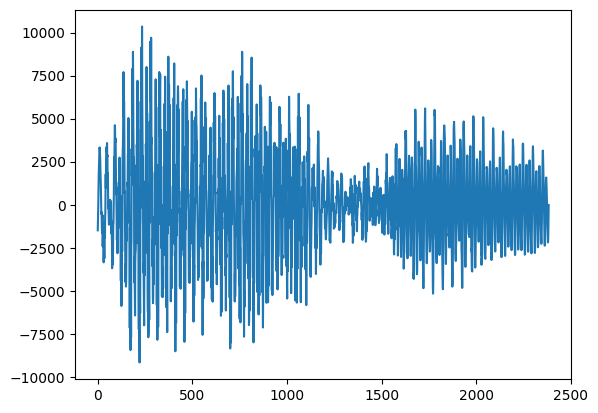

In [135]:
plt.plot(x)
plt.show()

## Question 8

In [136]:
scattering= Scattering1D(J,len(x),Q[0])
x= (((x-x.min())/(x.max()-x.min()))-0.5)*2


In [137]:
Sx= scattering(x)
Sx.shape

(222, 37)

## Question 9

In [83]:
scattering.meta()['order']

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

## Question 10

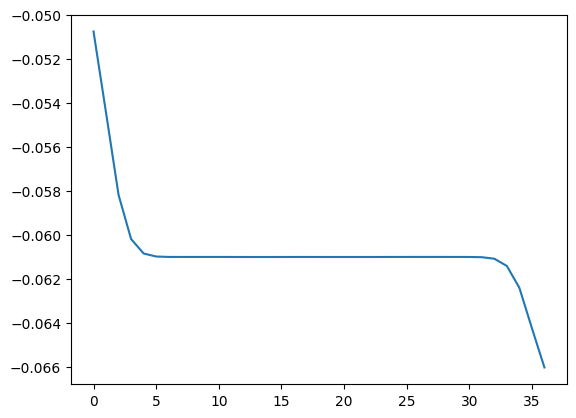

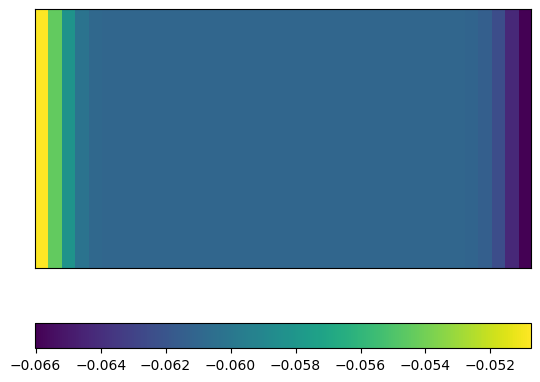

In [84]:
ids0= np.where(scattering.meta()['order']==0)
ids1= np.where(scattering.meta()['order']==1)
ids2= np.where(scattering.meta()['order']==2)

plt.plot(Sx[ids0].ravel())
plt.show()

im=plt.imshow(Sx[ids0],aspect='auto')
plt.yticks([])
plt.xticks([])
plt.colorbar(im,orientation='horizontal')
plt.show()

## Question 11

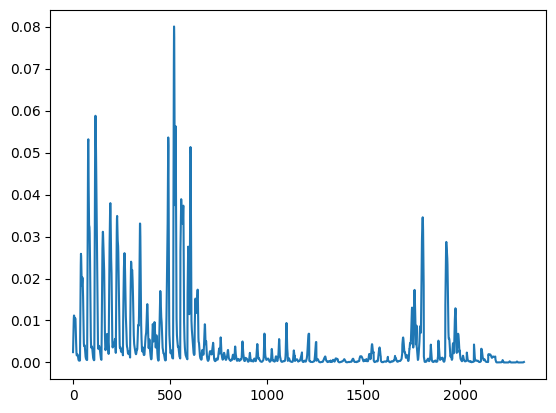

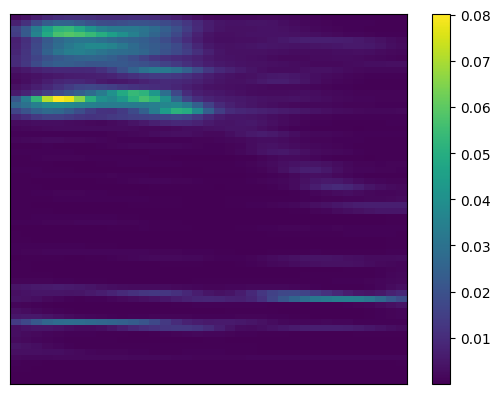

In [85]:
plt.plot(Sx[ids1].ravel())
plt.show()

im=plt.imshow(Sx[ids1],aspect='auto')
plt.yticks([])
plt.xticks([])
plt.colorbar(im)
plt.show()

## Question 12

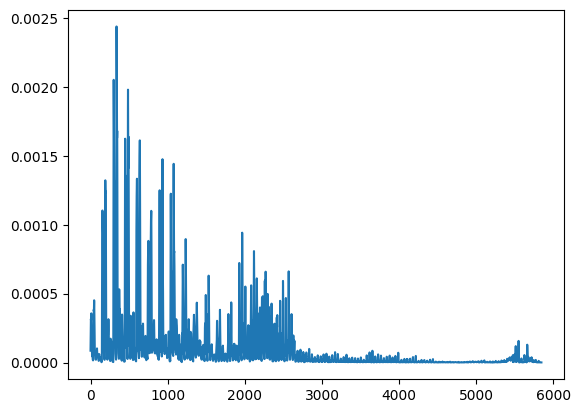

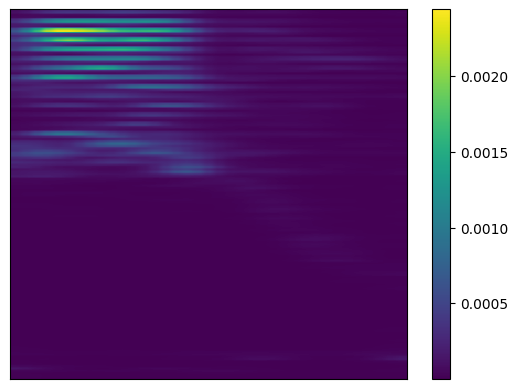

In [86]:
plt.plot(Sx[ids2].ravel())
plt.show()

im=plt.imshow(Sx[ids2],aspect='auto')
plt.yticks([])
plt.xticks([])
plt.colorbar(im)
plt.show()

## Question 13


In [87]:
J=8
Q=12
T=8192

In [88]:
warnings.filterwarnings('error')

signal_train=[]
signal_test=[]
Y_train= []
Y_test= []


for file in info_data['files']:
    filepath= os.path.join(info_data['path_dataset'],file)
    _,x= sp.io.wavfile.read(filepath)
    if len(x)>T:
        x= x[:T]

    elif len(x)<T:
        x= np.concat((np.zeros(T-len(x)),x)) 


    try:
        x= (((x-np.min(x))/(np.max(x)-np.min(x)))-0.5)*2
        id,cat= id_and_cat(file)
        if id>=5:
            signal_train.append(x)
            Y_train.append(cat)

        else:
            signal_test.append(x)
            Y_test.append(cat)


    except RuntimeWarning:
        pass
        

warnings.resetwarnings()
    



In [89]:
len(Y_train)/len(Y_test)

9.04026845637584

In [90]:
X_train=[]
X_test=[]

scattering= Scattering1D(J,T,Q)

for signal in tqdm(signal_train):
    Sx= scattering(signal)
    X_train.append(np.mean(Sx[1:],axis=1))

for signal in tqdm(signal_test):
    Sx= scattering(signal)
    X_test.append(np.mean(Sx[1:],axis=1))



100%|██████████| 298/298 [00:19<00:00, 15.33it/s]


In [91]:
X_train= np.array(X_train)
X_test= np.array(X_test)

In [95]:
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

In [96]:
svc= SVC(C=10,kernel='rbf',verbose=False)
svc.fit(X_train,Y_train)
svc.score(X_test,Y_test)

0.9765100671140939

In [97]:
lr= LogisticRegression(C=1e2,penalty='l1',solver='saga',max_iter=1000,verbose=True)
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)

max_iter reached after 68 seconds


c:\Users\prith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.9496644295302014